In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

df_rmse = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Results_archives/03_TF_1e-05_num_40_ep_10/rmse.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_test_loss = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Results_archives/03_TF_1e-05_num_40_ep_10/test_loss.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_train_loss = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Results_archives/03_TF_1e-05_num_40_ep_10/train_loss.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_r2 = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Results_archives/03_TF_1e-05_num_40_ep_10/r2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# metric box plot

In [57]:
def create_box_plot(df, metric_name):
    df = pd.melt(df.T)
    df.columns = ['Model names', metric_name]
    plt.figure(figsize=(7,7))
    sns.set(style="white", palette="Blues", color_codes=True)
    sns.boxplot(x="Model names", y=metric_name, data=df, width=0.5)
    plt.savefig(f"img/{metric_name}-boxplot.png",pad_inches=0.2, dpi=300,bbox_inches='tight')
    plt.close()

In [58]:
create_box_plot(df_rmse, 'RMSE')
create_box_plot(df_test_loss, 'MAE-test')
create_box_plot(df_train_loss, 'MAE-train')
create_box_plot(df_r2, 'R-squared')

# positional encoding visulization

In [133]:
df_train = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Data/train_dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_test = pd.read_csv(r'/Users/tinghsi/OneDrive - HKUST Connect/MPhil-thesis-github-library/MPhil-thesis/ACS_codes/Data/test_dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df_train['Datetime'] = pd.to_datetime(df_train['Datetime'],format = '%Y-%m-%d %H:%M')
df_test['Datetime'] = pd.to_datetime(df_test['Datetime'],format = '%Y-%m-%d %H:%M')
df_train_d = df_train.set_index('Datetime').resample('1d').mean()
df_test_d = df_test.set_index('Datetime').resample('1d').mean()

In [134]:
frames = [df_train_d['2021-11-1':], df_test_d[:'2021-11-30']]
df_pos_d = pd.concat(frames)

In [135]:
df_pos_d

,sin_hour,cos_hour,sin_day,cos_day,sin_month,cos_month
Datetime,,,,,,
2021-11-01,-5.088522e-17,-8.326673e-17,2.079117e-01,0.978148,-0.5,0.866025
2021-11-02,-5.088522e-17,-8.326673e-17,4.067366e-01,0.913545,-0.5,0.866025
2021-11-03,-5.088522e-17,-8.326673e-17,5.877853e-01,0.809017,-0.5,0.866025
2021-11-04,-5.088522e-17,-8.326673e-17,7.431448e-01,0.669131,-0.5,0.866025
2021-11-05,-5.088522e-17,-8.326673e-17,8.660254e-01,0.500000,-0.5,0.866025
2021-11-06,-5.088522e-17,-8.326673e-17,9.510565e-01,0.309017,-0.5,0.866025
2021-11-07,-5.088522e-17,-8.326673e-17,9.945219e-01,0.104528,-0.5,0.866025
2021-11-08,-5.088522e-17,-8.326673e-17,9.945219e-01,-0.104528,-0.5,0.866025
2021-11-09,-5.088522e-17,-8.326673e-17,9.510565e-01,-0.309017,-0.5,0.866025


<function matplotlib.pyplot.close(fig=None)>

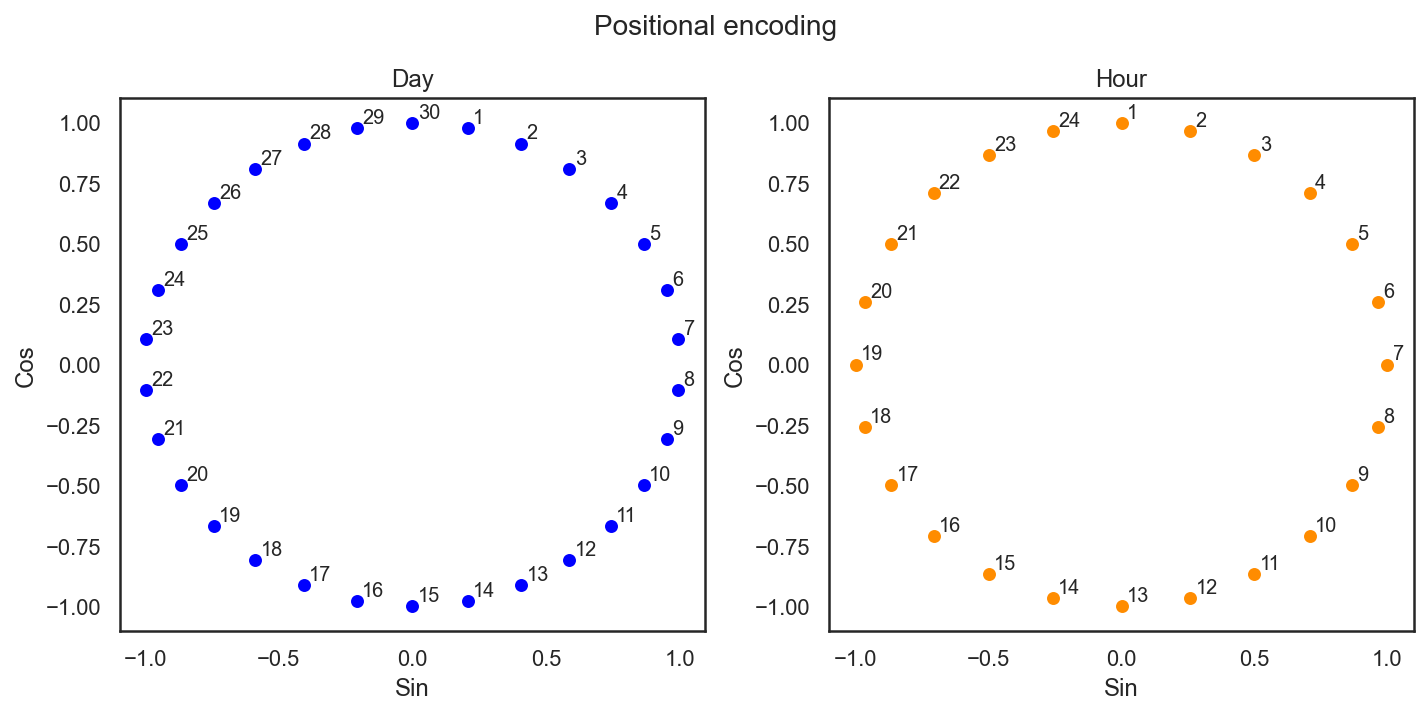

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle('Positional encoding', fontsize=14)
sin_day = df_pos_d['sin_day'].values
cos_day = df_pos_d['cos_day'].values
sin_hour = df_train['sin_hour'].values
cos_hour = df_train['cos_hour'].values

s_size = 30
font_size = 12

ax1.set_title('Day')
ax1.set_xlabel('Sin', fontsize=font_size)
ax1.set_ylabel('Cos', fontsize=font_size)
ax1.scatter(sin_day,cos_day, s=s_size, color='blue')

ax2.set_title('Hour')
ax2.set_xlabel('Sin', fontsize=font_size)
ax2.set_ylabel('Cos', fontsize=font_size)
ax2.scatter(sin_hour[:24], cos_hour[:24], s=s_size, color='darkorange')

n = np.arange(1,31)

for i, txt in enumerate(n):
    ax1.annotate(txt, (sin_day[i]+0.02, cos_day[i]+0.02))

m = np.arange(1,25)
for i, txt in enumerate(m):
    ax2.annotate(txt, (sin_hour[i]+0.02, cos_hour[i]+0.02))

plt.tight_layout()
plt.savefig(f"img/pos-encoding.png",pad_inches=0.2, dpi=300,bbox_inches='tight')
plt.close